### Data Transformation Explanation

In this section, we will perform several data transformations on the cleaned dataset to prepare it for further analysis. The transformations include:

1. **Dropping Unnecessary Columns:**
    - We have already dropped the columns `Unnamed: 15` and `Unnamed: 16` as they contained only `NaN` values and did not provide any useful information.

2. **Handling Missing Values:**
    - We explored different methods to handle missing values in the dataset:
      - **Drop Rows with Missing Values:** We created a new DataFrame `df_dropna` by removing rows that contain any missing values.
      - **Fill Missing Values with Zero:** We created a new DataFrame `df_fillna` by filling missing values with zero.
      - **Fill Missing Values with Mean:** We created a new DataFrame `df_fillmean` by filling missing values with the mean of the respective columns.
      - **Fill Missing Values with Median:** We created a new DataFrame `df_fillmedian` by filling missing values with the median of the respective columns.

3. **Data Type Conversion:**
    - We need to convert certain columns from object type to appropriate numerical types for accurate analysis. For example, columns like `CO(GT)`, `C6H6(GT)`, `T`, `RH`, and `AH` should be converted to numerical types.

4. **Feature Scaling:**
    - To ensure that all features contribute equally to the analysis, we will apply feature scaling using `StandardScaler` from `sklearn.preprocessing`.

By performing these transformations, we aim to clean and standardize the dataset, making it suitable for various analytical and machine learning tasks.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [193]:
df = pd.read_csv('AirQuality.csv', delimiter=';')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

### Dropping Unnamed: 15 and Unnamed: 16 Columns

The columns `Unnamed: 15` and `Unnamed: 16` in the dataframe `df` contain only `NaN` values. These columns do not provide any useful information for our analysis and only occupy memory. Therefore, it is a good practice to drop these columns to clean the dataset and make it more efficient for further processing.

By removing these columns, we can reduce the memory usage and avoid potential issues in our data analysis and modeling steps.

In [195]:
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace = True)

In [196]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

from sklearn.impute import SimpleImputer

### Dealing with Null and NaN Values in DataFrame

Handling missing data is a crucial step in data preprocessing. Here are some common methods to deal with null and NaN values in a DataFrame:

1. **Removing Null Values:**
    - **Drop Rows:** You can remove rows that contain any null values using `dropna()`.
      ```python
      df.dropna(inplace=True)
      ```
    - **Drop Columns:** You can remove columns that contain any null values using `dropna(axis=1)`.
      ```python
      df.dropna(axis=1, inplace=True)
      ```

2. **Filling Null Values:**
    - **Fill with a Specific Value:** You can fill null values with a specific value using `fillna()`.
      ```python
      df.fillna(0, inplace=True)
      ```
    - **Forward Fill:** You can propagate the last valid observation forward to the next valid using `ffill()`.
      ```python
      df.ffill(inplace=True)
      ```
    - **Backward Fill:** You can use the next valid observation to fill the gap using `bfill()`.
      ```python
      df.bfill(inplace=True)
      ```

3. **Interpolation:**
    - You can use interpolation to estimate the missing values using `interpolate()`.
      ```python
      df.interpolate(method='linear', inplace=True)
      ```

4. **Replacing Null Values:**
    - You can replace null values with another value using `replace()`.
      ```python
      df.replace(to_replace=np.nan, value=0, inplace=True)
      ```

5. **Using Scikit-Learn Imputer:**
    - You can use `SimpleImputer` from `sklearn.impute` to fill missing values.
      ```python
      imputer = SimpleImputer(strategy='mean')
      df[['column_name']] = imputer.fit_transform(df[['column_name']])
      ```

Each method has its own advantages and is suitable for different scenarios. The choice of method depends on the nature of the data and the specific requirements of the analysis.

In [197]:
#Using the Dropna function to remove rows with missing values
df_dropna = df.dropna()
df_dropna.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [198]:
#Using the fillna function to fill missing values with 0
df_fillna = df.fillna(0)
df_fillna.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [199]:
#Using the fillna function to fill missing values with the mean of the column
df_fillmean = df
for i in df_fillmean.columns:
    if df_fillmean[i].dtype != 'object':
        df_fillmean[i].fillna(df_fillmean[i].mean(), inplace = True)
    else:
        df_fillmean[i].fillna('0', inplace = True)
df_fillmean.isnull().sum()

/tmp/ipykernel_5702/863094514.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillmean[i].fillna('0', inplace = True)
/tmp/ipykernel_5702/863094514.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [200]:
#Using the fillna function to fill missing values with the median of the column
df_fillmedian = df
for i in df_fillmedian.columns:
    if df_fillmedian[i].dtype != 'object':
        df_fillmedian[i].fillna(df_fillmedian[i].median(), inplace = True)
    else:
        df_fillmedian[i].fillna('0', inplace = True)

df_fillmedian.isnull().sum()

/tmp/ipykernel_5702/97924506.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillmedian[i].fillna(df_fillmedian[i].median(), inplace = True)
/tmp/ipykernel_5702/97924506.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### Feature Scaling

To ensure that all features contribute equally to the analysis, we will apply feature scaling using `StandardScaler` from `sklearn.preprocessing`. Feature scaling is essential for algorithms that compute distances between data points, such as k-nearest neighbors and support vector machines. It helps in normalizing the range of independent variables or features of data.



In [201]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

Date
Time
CO(GT)
C6H6(GT)
T
RH
AH


In [202]:
df[:] = df[:9357]
for i in df.columns:
    if i == 'Date':
        df.dropna(subset=[i], inplace = True)
    if i == 'Time':
        df.dropna(subset=[i], inplace = True)
    if df[i].dtype == 'object':
        df.fillna('0', inplace = True)
    else:
        df.fillna(df[i].median(), inplace = True)
print(df.isnull().sum())
df[['Day', 'Month', 'Year']] = df['Date'].str.split('/', expand = True).astype(int)
df.drop(columns = ['Date'], inplace = True)
df[['Hour', 'Minute', 'Second']] = df['Time'].str.split('.', expand = True).astype(int)
df.drop(columns = ['Time'], inplace = True)
desired_order = ['Year', 'Month', 'Day'] + ['Hour', 'Minute', 'Second'] + [col for col in df.columns if col not in ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']]
df = df[desired_order]
df

/tmp/ipykernel_5702/440559514.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       1360.0
1       1292.0
2       1402.0
3       1376.0
4       1272.0
         ...  
9352    1314.0
9353    1163.0
9354    1142.0
9355    1003.0
9356    1071.0
Name: PT08.S1(CO), Length: 9357, dtype: float64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[:] = df[:9357]
/tmp/ipykernel_5702/440559514.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       150.0
1       112.0
2        88.0
3        80.0
4        51.0
        ...  
9352   -200.0
9353   -200.0
9354   -200.0
9355   -200.0
9356   -200.0
Name: NMHC(GT), Length: 9357, dtype: float64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[:] = df[:9357]
/tmp/ipykernel_5702/440559514.py:1: FutureWarning: Setting a

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


,Year,Month,Day,Hour,Minute,Second,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004,3,10,18,0,0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2004,3,10,19,0,0,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,2004,3,10,20,0,0,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,2004,3,10,21,0,0,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,2004,3,10,22,0,0,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005,4,4,10,0,0,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,2005,4,4,11,0,0,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,2005,4,4,12,0,0,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,2005,4,4,13,0,0,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [203]:
for i in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    df[i] = df[i].replace(',', '', regex=True).astype(float)
df[['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']]

,CO(GT),C6H6(GT),T,RH,AH
0,26.0,119.0,136.0,489.0,7578.0
1,2.0,94.0,133.0,477.0,7255.0
2,22.0,90.0,119.0,540.0,7502.0
3,22.0,92.0,110.0,600.0,7867.0
4,16.0,65.0,112.0,596.0,7888.0
...,...,...,...,...,...
9352,31.0,135.0,219.0,293.0,7568.0
9353,24.0,114.0,243.0,237.0,7119.0
9354,24.0,124.0,269.0,183.0,6406.0
9355,21.0,95.0,283.0,135.0,5139.0


In [204]:
df.dtypes

Year               int64
Month              int64
Day                int64
Hour               int64
Minute             int64
Second             int64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [208]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,Year,Month,Day,Hour,Minute,Second,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-0.562169,-0.962879,-0.667207,0.939133,0.0,0.0,0.297459,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,-0.282185,0.109702,-0.510088
1,-0.562169,-0.962879,-0.667207,1.083583,0.0,0.0,0.184135,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,-0.308483,0.054248,-0.582722
2,-0.562169,-0.962879,-0.667207,1.228033,0.0,0.0,0.278572,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,-0.431209,0.345381,-0.527179
3,-0.562169,-0.962879,-0.667207,1.372483,0.0,0.0,0.278572,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,-0.510105,0.622650,-0.445100
4,-0.562169,-0.962879,-0.667207,1.516933,0.0,0.0,0.250241,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,-0.492572,0.604165,-0.440378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1.778825,-0.672011,-1.348392,-0.216467,0.0,0.0,0.321068,0.803511,-0.292670,0.281172,0.602967,1.178552,-0.795059,1.038740,-0.037415,1.650044,0.445406,-0.796045,-0.512337
9353,1.778825,-0.672011,-1.348392,-0.072017,0.0,0.0,0.288016,0.345678,-0.292670,0.230420,0.386792,0.716273,-0.593181,0.952081,-0.272867,0.643290,0.655794,-1.054830,-0.613305
9354,1.778825,-0.672011,-1.348392,0.072433,0.0,0.0,0.288016,0.282006,-0.292670,0.254587,0.491958,0.483191,-0.596287,0.920568,-0.322099,0.255908,0.883714,-1.304372,-0.773639
9355,1.778825,-0.672011,-1.348392,0.216883,0.0,0.0,0.273850,-0.139442,-0.292670,0.184502,0.193987,0.257878,-0.288811,0.770884,-0.750194,-0.448820,1.006440,-1.526188,-1.058553


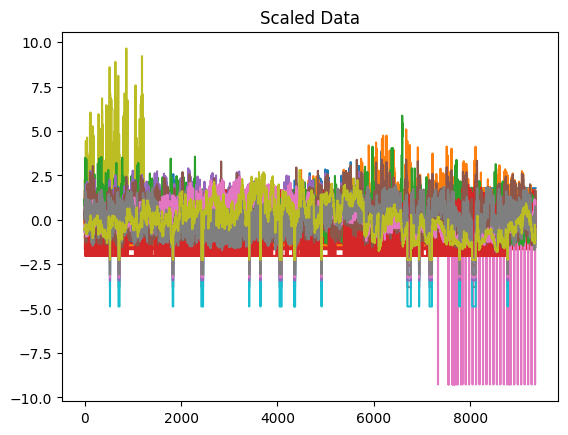

In [210]:
plt.plot(df_scaled)
plt.title('Scaled Data')
plt.show()

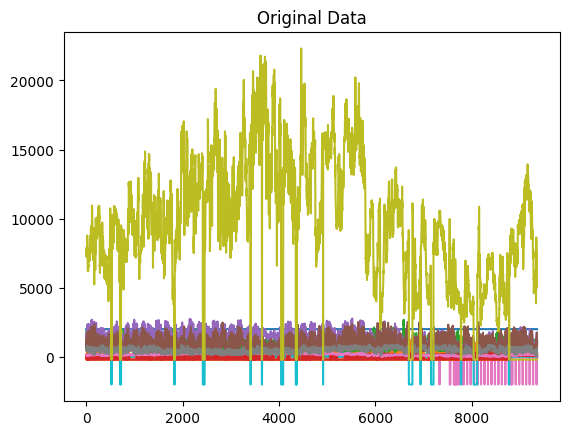

In [211]:
plt.plot(df)
plt.title('Original Data')
plt.show()